Step 1: Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso # For model bulding
from sklearn.model_selection import train_test_split, cross_val_score # For splitting and cross validating
from statistics import mean

Step 2: Loading and cleaning the Data

In [4]:
# Loading the data into a Pandas DataFrame
data = pd.read_csv('Datasets\kc_house_data.csv')

# Dropping the numerically non-sensical variables
dropColumns = ['id', 'date', 'zipcode']
data = data.drop(dropColumns, axis = 1)

# Separating the dependent and independent variables
y = data['price']
X = data.drop('price', axis = 1)

# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Step 3: Building and evaluating the different models

a) Linear Regression:

In [21]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.6880374419853503


b) Ridge (L2) Regression:

In [22]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):  # Range 1 to 9 means we are building 8 models
    
    ridgeModel = Ridge(alpha = i * 0.25) # lambda the tuning parameter is set to some very low value
    
    ridgeModel.fit(X_train, y_train)     # Model is being fitted on every itearation of for loop
    
    scores = cross_val_score(ridgeModel, X, y, cv = 10) # every model is 10 times cross validated and
    
    avg_cross_val_score = mean(scores)*100              # Avg score is calculated every time for those 8 models
    
    cross_val_scores_ridge.append(avg_cross_val_score)  # Avg scores of the model appended in list
    
    alpha.append(i * 0.25) # Lambda aka alpha appended for printing purpose below in next for loop

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 69.09106289827389
0.5 : 69.0912387140147
0.75 : 69.09139481819095
1.0 : 69.09153141333407
1.25 : 69.09164869965377
1.5 : 69.09174687506959
1.75 : 69.09182613524133
2.0 : 69.09188667359876


In [5]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)

# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.6838795152055821


You can easily see the difference there for alpha value 2 because above we have used the 10 fold CV and taken the avg of scores just to estimate the better alpha for this data for using Ridge

# So, lets understand cross validation

In machine learning, we couldn’t fit the model on the training data and can’t say that the model will work accurately for the real data. For this, we must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.

Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance.

The main purpose of cross validation is to prevent overfitting, which occurs when a model is trained too well on the training data and performs poorly on new, unseen data. By evaluating the model on multiple validation sets, cross validation provides a more realistic estimate of the model’s generalization performance, i.e., its ability to perform well on new, unseen data.

There are several types of cross validation techniques, including k-fold cross validation, leave-one-out cross validation, and stratified cross validation. The choice of technique depends on the size and nature of the data, as well as the specific requirements of the modeling problem.

In summary, cross validation is an important step in the machine learning process and helps to ensure that the model selected for deployment is robust and generalizes well to new data.

Cross-Validation

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set. The three steps involved in cross-validation are as follows :

Reserve some portion of sample data-set.
Using the rest data-set train the model.
Test the model using the reserve portion of the data-set.

# Comparison of train/test split to cross-validation

Advantages of train/test split:

1. This runs K times faster than Leave One Out cross-validation because K-fold cross-validation repeats the train/test split K-times.
2. Simpler to examine the detailed results of the testing process.

Advantages of cross-validation:

1. More accurate estimate of out-of-sample accuracy.
2. More “efficient” use of data as every observation is used for both training and testing.

# For more information we can see the documentation for it in sklearn on following link :

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Now let's continue with

c) Lasso (L1) Regression:

In [31]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []

# List to maintain the different values of Lambda
Lambda = []

# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296791660572309.3, tolerance: 215752051746.79382
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362113978957932.4, tolerance: 260338435647.3446
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357023115012924.44, tolerance: 257434552717.56076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366929584135491.75, tolerance: 264881311650.3594
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369590928440900.7, tolerance: 265143078378.3168
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366278393514935.9, tolerance: 263243468998.86066
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362148860087068.8, tolerance: 260338435647.3446
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357057751922170.25, tolerance: 257434552717.56076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368103407913573.6, tolerance: 266518103189.1452
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369626782936665.4, tolerance: 265143078378.3168
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366314483788297.5, tolerance: 263243468998.86066
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365011582364594.25, tolerance: 262486432542.90622
  model = cd_fast.enet_coordinate_descent(


0.25 : 69.09087262792927
0.5 : 69.09087806287656
0.75 : 69.09088347092654
1.0 : 69.09088885207933
1.25 : 69.09089420633482
1.5 : 69.09089953369303
1.75 : 69.09090483415399
2.0 : 69.09091010771776


C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362292668508879.44, tolerance: 261011161690.6104
  model = cd_fast.enet_coordinate_descent(


From the above output, we can conclude that the best value of lambda is 2 for this data.

In [32]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2)
lassoModelChosen.fit(X_train, y_train)

# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.6880375199788482


C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296832924349090.6, tolerance: 215752051746.79382
  model = cd_fast.enet_coordinate_descent(


Step 4: Comparing and Visualizing the results

In [33]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
          ridgeModelChosen.score(X_test, y_test),
          lassoModelChosen.score(X_test, y_test)]

# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = linearModel.score(X_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)

# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regression : 0.6880374419853503
Ridge Regression : 0.6880219230749209
Lasso Regression : 0.6880375199788482


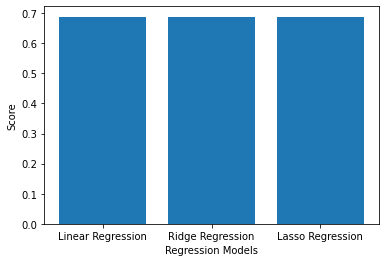

In [34]:
# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

# For more information we can always refer the sklearn's documentations for both Ridge and Lasso